## Column Names and Description

In [ ]:
"""
Columns
The following columns are available on the training set:

accepts_mercadopago Whether the item accepts Mercado Pago
available_quantity The available stock quantity at that moment
avg_asp_item_bday Average selling price of this item over the last days
avg_asp_item_domain Average price of items of the domain this item belongs to
avg_asp_item_sel Average price of seller sales
avg_gmv_item_bday average revenue generated by the item per day
avg_gmv_item_domain_30days Average revenue generated by the items of this domain on the last month
avg_gmv_item_sel Average revenue of items of this seller
avg_gmv_seller_bday Average revenue this seller makes by day
avg_orders_item_bday Average number of orders this item has by day
avg_orders_seller_bday Average orders the seller has by day
avg_qty_orders_item_domain_30days Average number of orders a random item of this domain made on the last month
avg_qty_orders_item_sel_30days Average number of orders an item of this seller makes on the last 30 days
avg_si_item_bday Average units sold this item has by day
avg_si_item_sel_30day Average units sold of an item of this seller on the past month
avg_visits_item Average visits this item had
benefit Ignore, should be dropped
boosted Whether the item was boosted
buy_server_timestamp Timestamp of the purchase
category_id Category of this item
conversion Target variable, it is True if this print has an attributed order
cus_cust_id Buyer id
cus_cust_id_sel Seller id
date Print date
deal_print_id Unique id for the print
decimals Ignore, will be dropped
domain_id Domain id for the item
etl_version Ignore, should be dropped
free_shipping Whether the item has free shipping
fulfillment Whether the item is fulfilled by MeLi
full_name Category full name
health Item health
is_pdp Whether the click landed on a PDP
product_id Product_id of the item
item_id ID of the item, useful for debugging
listing_type_id Whether the item is gold or not
logistic_type Logistic type for the item
main_picture URL for the main item picture
offset On which page the item was rendered
original_price Price from which the discount was done
platform Which platform the user is using
price Item price
print_position Position on the page
print_server_timestamp Timestamp for the print
qty_items_dom Number of items this domain has
qty_items_sel Number of items the seller has
rn Leftover from the ETL, Discard
ROW_ID Row of the submission file
site_id Site ID
sold_quantity Number of items sold at the moment of the print
tags Tags the item had at the moment of the print
title Item title
total_asp_item_domain_30days Average selling price of the items of the domain
total_asp_item_sel_30days Average selling price of all the items the seller sold on the last 30 days
total_gmv_domain_30days Total revenue the domain made on the last 30 days
total_gmv_domain_bday total_gmv_domain_30days / 30
total_gmv_item_30days Total revenue made by the item on the lasts 30 days
total_gmv_seller Total revenue made by the seller on the last month
total_items_domain Number of items on the domain
total_items_seller Number of items the seller has
total_orders_domain_30days Total orders on the domain
total_orders_item_30days Total orders the Item had on the last 30 days
total_orders_sel_30days Total orders for the seller
total_si_domain_30days Total units sold of this domain
total_si_item_30days Total units sold of this item
total_si_sel_30days Same for the seller
total_visits_domain Total visits on this domain
total_visits_item Total visits this item had
total_visits_seller Total visits for this seller
uid session id
user_id user id
warranty Whether the item had warranty
"""

'\nColumns\nThe following columns are available on the training set:\n\naccepts_mercadopago Whether the item accepts Mercado Pago\navailable_quantity The available stock quantity at that moment\navg_asp_item_bday Average selling price of this item over the last days\navg_asp_item_domain Average price of items of the domain this item belongs to\navg_asp_item_sel Average price of seller sales\navg_gmv_item_bday average revenue generated by the item per day\navg_gmv_item_domain_30days Average revenue generated by the items of this domain on the last month\navg_gmv_item_sel Average revenue of items of this seller\navg_gmv_seller_bday Average revenue this seller makes by day\navg_orders_item_bday Average number of orders this item has by day\navg_orders_seller_bday Average orders the seller has by day\navg_qty_orders_item_domain_30days Average number of orders a random item of this domain made on the last month\navg_qty_orders_item_sel_30days Average number of orders an item of this seller 

## Librerias

In [1]:
from IPython.display import display, Markdown

import pandas as pd
import gc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score

from sklearn.metrics import roc_auc_score

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, space_eval

from sklearn.tree import plot_tree

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler, OneHotEncoder

# XGBoost
import xgboost as xgb

import numpy as np

import matplotlib.pyplot as plt

import itertools

## Load Comp Data

In [2]:
comp_data = pd.read_csv("data/competition_data.csv")

In [3]:
# covariance matrix comp_data

comp_data.cov()

,accepts_mercadopago,available_quantity,avg_gmv_item_domain_30days,avg_gmv_item_sel,avg_gmv_seller_bday,avg_qty_orders_item_domain_30days,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,benefit,boosted,...,total_orders_item_30days,total_orders_sel_30days,total_si_domain_30days,total_si_item_30days,total_si_sel_30days,total_visits_domain,total_visits_item,total_visits_seller,user_id,ROW_ID
accepts_mercadopago,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
available_quantity,0.0,1.282870e+08,-1.602050e+05,-1.318542e+06,-1.284476e+07,2206.424411,5.164742e+03,1.782288e+04,-4.315228e-02,0.0,...,5.215185e+04,5.466590e+05,3.203873e+07,2.357804e+05,6.407035e+06,-2.181770e+09,3.257146e+06,-1.060684e+08,-6.576783e+09,9.373259e+05
avg_gmv_item_domain_30days,0.0,-1.602050e+05,2.428883e+05,7.787167e+05,4.739187e+06,363.255330,1.988489e+03,1.991396e+03,-5.932192e-03,0.0,...,7.854668e+03,3.747492e+05,6.734184e+05,6.781690e+03,2.928159e+05,2.625718e+08,1.203977e+06,1.146363e+07,1.436749e+09,9.389066e+03
avg_gmv_item_sel,0.0,-1.318542e+06,7.787167e+05,1.835477e+07,3.924391e+07,562.621426,7.223997e+04,8.399332e+04,-5.444436e-02,0.0,...,1.261645e+05,3.179535e+06,9.818294e+06,1.191200e+05,3.077886e+06,2.482748e+09,1.450842e+07,1.167402e+08,8.204382e+09,-1.191648e+05
avg_gmv_seller_bday,0.0,-1.284476e+07,4.739187e+06,3.924391e+07,6.957859e+08,3425.917684,1.119217e+05,1.074061e+05,-6.749622e-02,0.0,...,3.640944e+05,1.069052e+08,4.355250e+07,2.554271e+05,1.133153e+08,1.457951e+10,3.249980e+07,4.432225e+09,7.167804e+10,-5.010124e+05
avg_qty_orders_item_domain_30days,0.0,2.206424e+03,3.632553e+02,5.626214e+02,3.425918e+03,7.663254,9.587900e+00,1.851551e+01,-1.942166e-05,0.0,...,9.003997e+01,1.010149e+03,2.358360e+04,1.585146e+02,1.959733e+03,-6.666206e+05,5.611427e+03,-3.597632e+04,9.365943e+05,9.454012e+00
avg_qty_orders_item_sel_30days,0.0,5.164742e+03,1.988489e+03,7.223997e+04,1.119217e+05,9.587900,6.577041e+02,8.030306e+02,-2.632899e-04,0.0,...,1.439224e+03,2.278825e+04,7.986637e+04,1.643741e+03,2.742367e+04,5.658964e+06,1.457737e+05,8.537635e+05,3.367338e+07,2.950679e+02
avg_si_item_sel_30day,0.0,1.782288e+04,1.991396e+03,8.399332e+04,1.074061e+05,18.515512,8.030306e+02,1.132217e+03,-2.443250e-04,0.0,...,1.796675e+03,2.630055e+04,2.306859e+05,2.627781e+03,4.412733e+04,3.878952e+06,1.761239e+05,6.635080e+05,2.787178e+07,1.877823e+02
benefit,0.0,-4.315228e-02,-5.932192e-03,-5.444436e-02,-6.749622e-02,-0.000019,-2.632899e-04,-2.443250e-04,2.360354e-08,0.0,...,4.131431e-04,4.208095e-03,3.212855e-02,8.238770e-04,1.045140e-02,-7.932719e+00,2.893731e-02,4.494010e-01,-1.553376e+01,1.049193e-02
boosted,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [6]:
# Top Covariances 
covs = comp_data.cov()
# Fill diagonal with 0s
for i in range(len(covs)):
    covs.iloc[i,i] = 0

covs.unstack().sort_values(ascending=False).drop_duplicates().head(10)

user_id                total_visits_domain      1.983991e+13
product_id             user_id                  8.415821e+12
total_visits_domain    product_id               3.018949e+12
total_visits_seller    user_id                  1.129154e+12
user_id                total_gmv_domain_bday    6.900803e+11
total_visits_domain    total_visits_seller      4.265236e+11
total_gmv_domain_bday  total_visits_domain      2.820792e+11
                       product_id               2.325180e+11
total_items_domain     user_id                  2.315830e+11
total_visits_domain    total_items_domain       1.592637e+11
dtype: float64

In [7]:
comp_data.head()

,accepts_mercadopago,available_quantity,avg_gmv_item_domain_30days,avg_gmv_item_sel,avg_gmv_seller_bday,avg_qty_orders_item_domain_30days,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,benefit,boosted,...,total_si_domain_30days,total_si_item_30days,total_si_sel_30days,total_visits_domain,total_visits_item,total_visits_seller,uid,user_id,warranty,ROW_ID
0,True,59,938.031376,2153.933091,135195.200333,3.430563,12.407860,13.691450,0.001,False,...,56717.0,17.0,25781.0,7993972,543,854813,cb5bfac7-229a-4e3e-96dd-80b2ad3972c1,NaN,Garantía de fábrica: 12 meses,NaN
1,True,37,159.826531,240.325973,19338.230000,3.142739,4.429577,4.511599,0.001,False,...,81455.0,5.0,10891.0,7821316,1789,1422288,b0f9aa19-00d5-4afd-aa77-45be7c849562,NaN,NaN,NaN
2,True,9,67.635391,86.066296,154.919333,2.633771,2.592593,2.722222,0.001,False,...,16792.0,8.0,147.0,1303909,1473,17801,fd59890a-f2c2-4282-b2ee-c68f25e20697,151157147.0,NaN,NaN
3,True,12,92.085756,332.848400,554.747333,3.280069,12.620000,12.840000,0.001,False,...,1988.0,14.0,642.0,139419,7473,44336,72340acf-2a1c-4214-a604-132e0cb56939,NaN,Garantía de fábrica: 90 días,NaN
4,True,5,156.905222,955.997475,3154.791667,2.737876,3.666667,4.363636,0.001,False,...,8707.0,32.0,432.0,209373,416,46206,84da1314-814c-4d4f-be23-3de9ea1da4b6,NaN,Garantía del vendedor: 90 días,NaN


In [8]:
comp_data.describe()

,available_quantity,avg_gmv_item_domain_30days,avg_gmv_item_sel,avg_gmv_seller_bday,avg_qty_orders_item_domain_30days,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,benefit,conversion,health,...,total_orders_item_30days,total_orders_sel_30days,total_si_domain_30days,total_si_item_30days,total_si_sel_30days,total_visits_domain,total_visits_item,total_visits_seller,user_id,ROW_ID
count,199972.000000,195607.000000,195607.000000,195607.000000,195607.000000,195607.000000,195607.000000,199971.000000,180761.000000,199972.000000,...,195607.000000,195607.000000,195607.000000,195607.000000,195607.000000,1.999720e+05,199972.000000,1.999720e+05,1.783750e+05,19211.000000
mean,2142.683766,333.141264,1160.099822,10815.338962,4.385187,13.542561,18.286236,0.000976,0.092631,0.809401,...,65.176297,3941.158614,29197.693135,88.487667,5238.731257,2.170257e+06,5571.603790,2.542803e+05,2.246094e+08,9605.000000
std,11326.386712,492.836951,4284.246365,26377.753704,2.768258,25.645743,33.648431,0.000154,0.289915,0.146368,...,129.610777,5145.727129,49694.994203,220.606860,6809.183739,3.545316e+06,12108.897095,3.458552e+05,1.474232e+08,5545.882346
min,0.000000,4.909057,4.773333,0.660000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,4.000000,1.000000,2.000000,3.160000e+02,1.000000,1.100000e+01,1.610000e+02,0.000000
25%,19.000000,86.729688,143.184865,793.281667,2.876796,4.188679,4.916896,0.001000,0.000000,0.770000,...,6.000000,718.000000,3938.000000,7.000000,943.000000,1.899680e+05,407.000000,4.804600e+04,1.053200e+08,4802.500000
50%,67.000000,169.234106,262.266733,2733.067000,3.639912,6.768293,8.875000,0.001000,0.000000,0.810000,...,20.000000,2102.000000,11660.000000,24.000000,2713.000000,5.613990e+05,1496.000000,1.263900e+05,1.976426e+08,9605.000000
75%,371.000000,319.281502,675.989333,9217.855667,5.066384,13.403873,18.558559,0.001000,0.000000,0.900000,...,63.000000,5017.000000,38725.000000,80.000000,6455.000000,2.007145e+06,5248.000000,2.817150e+05,3.202613e+08,14407.500000
max,99999.000000,3778.257881,57282.961233,244988.442667,38.148629,258.363636,465.500000,0.001000,1.000000,1.000000,...,1853.000000,36492.000000,505258.000000,8269.000000,56189.000000,1.591114e+07,195413.000000,2.938795e+06,1.000014e+09,19210.000000


In [ ]:
display(
    Markdown(
        "\n".join(
            [
                #"- **{}** ({}) \n\n {}".format(col, dtype, comp_data[col].value_counts()) for col, dtype in
                #"- **{}** ({})".format(col, dtype) for col, dtype in
                #zip(comp_data.columns, comp_data.dtypes)
                "- **{}**".format(col) for col in comp_data.columns
            ]
        )
    )
)

- **accepts_mercadopago**
- **available_quantity**
- **avg_gmv_item_domain_30days**
- **avg_gmv_item_sel**
- **avg_gmv_seller_bday**
- **avg_qty_orders_item_domain_30days**
- **avg_qty_orders_item_sel_30days**
- **avg_si_item_sel_30day**
- **benefit**
- **boosted**
- **category_id**
- **conversion**
- **date**
- **deal_print_id**
- **domain_id**
- **etl_version**
- **free_shipping**
- **fulfillment**
- **full_name**
- **health**
- **is_pdp**
- **product_id**
- **item_id**
- **listing_type_id**
- **logistic_type**
- **main_picture**
- **offset**
- **original_price**
- **platform**
- **price**
- **print_position**
- **print_server_timestamp**
- **qty_items_dom**
- **qty_items_sel**
- **site_id**
- **sold_quantity**
- **tags**
- **title**
- **total_asp_item_domain_30days**
- **total_asp_item_sel_30days**
- **total_gmv_domain_bday**
- **total_gmv_item_30days**
- **total_items_domain**
- **total_items_seller**
- **total_orders_domain_30days**
- **total_orders_item_30days**
- **total_orders_sel_30days**
- **total_si_domain_30days**
- **total_si_item_30days**
- **total_si_sel_30days**
- **total_visits_domain**
- **total_visits_item**
- **total_visits_seller**
- **uid**
- **user_id**
- **warranty**
- **ROW_ID**

## Data Cleaning

In [41]:
comp_data = pd.read_csv("data/competition_data.csv")
comp_data = comp_data.drop(
        columns=[
            "accepts_mercadopago", # Todos tienen mercadopago
            "boosted", # Ninguno
            "avg_qty_orders_item_domain_30days",
            "avg_qty_orders_item_sel_30days",
            "avg_si_item_sel_30day",
            #"date",
            "deal_print_id",
            "etl_version",
            "full_name",
            "main_picture",
            "print_server_timestamp",
            #"title",
            "uid",
            #"user_id",
            "avg_gmv_item_domain_30days",
            #"avg_gmv_item_sel",
            "avg_gmv_seller_bday",
            #"qty_items_dom",
            #"category_id",
            #"domain_id",
            "product_id",
            #"listing_type_id",
            "logistic_type",
            "site_id",
            #"tags",
            "total_asp_item_sel_30days", 
            "total_gmv_domain_bday", 
            "total_items_domain", 
            "total_items_seller", 
            "total_orders_domain_30days", 
            "total_orders_item_30days", 
            "total_orders_sel_30days", 
            "total_si_sel_30days", 
            "total_visits_domain", 
            #"total_visits_item", 
            #"total_visits_seller",
            "total_asp_item_domain_30days",
            "total_gmv_item_30days",
            "total_si_domain_30days",
            "total_si_item_30days",
            "warranty"
        ]
    )

In [ ]:
display(
    Markdown(
        "\n".join(
            [
                #"- **{}** ({}) \n\n {}".format(col, dtype, comp_data[col].value_counts()) for col, dtype in
                #"- **{}** ({})".format(col, dtype) for col, dtype in
                #zip(comp_data.columns, comp_data.dtypes)
                "- **{}**".format(col) for col in comp_data.columns
            ]
        )
    )
)

- **available_quantity**
- **avg_gmv_item_sel**
- **benefit**
- **category_id**
- **conversion**
- **date**
- **domain_id**
- **free_shipping**
- **fulfillment**
- **health**
- **is_pdp**
- **item_id**
- **listing_type_id**
- **offset**
- **original_price**
- **platform**
- **price**
- **print_position**
- **qty_items_dom**
- **qty_items_sel**
- **sold_quantity**
- **tags**
- **title**
- **total_visits_item**
- **total_visits_seller**
- **user_id**
- **ROW_ID**

In [ ]:
# tags = comp_data["tags"].str.replace("[", "").str.replace("]", "").str.split(", ").apply(pd.Series).stack().value_counts()

In [ ]:
# tags

In [ ]:
# # For tag in tags, create a new column with the tag name and a boolean value
# for tag in tags.index:
#     comp_data[tag] = comp_data["tags"].str.contains(tag).astype(int)

# comp_data["tags_count"] = comp_data["tags"].str.replace("[", "").str.replace("]", "").str.split(", ").apply(len)

# comp_data = comp_data.drop("tags", axis=1)

In [ ]:
comp_data["category_id"].value_counts()

MLA109027    12333
MLA1055       8641
MLA3724       5870
MLA1002       5446
MLA3697       4154
             ...  
MLA412712        1
MLA429714        1
MLA392534        1
MLA417046        1
MLA9695          1
Name: category_id, Length: 2284, dtype: int64

In [ ]:
# comp_data["domain_id"] = LabelEncoder().fit_transform(comp_data["domain_id"]).astype(int)
# comp_data["product_id"] = LabelEncoder().fit_transform(comp_data["product_id"]).astype(int)

# OneHotEncoder
# comp_data = pd.get_dummies(comp_data, columns=["category_id"], dtype=int, sparse=True, dummy_na = False)
# Add category_id ohe category column if that category has more than 1000 ocurrences
# ocurrences = comp_data["category_id"].value_counts()
# for category_id in ocurrences[ocurrences > 1000].index:
#     comp_data["category_id_" + str(category_id)] = comp_data["category_id"] == category_id
#     comp_data["category_id_" + str(category_id)] = comp_data["category_id_" + str(category_id)].astype(int)
# comp_data = comp_data.drop(columns=["category_id"])

# comp_data = pd.get_dummies(comp_data, columns=["logistic_type"], dtype=int, sparse=True, dummy_na = False)

In [42]:
comp_data["date"] = pd.to_datetime(comp_data["date"])
comp_data["day"] = comp_data["date"].dt.day
comp_data["month"] = comp_data["date"].dt.month
#comp_data["hour"] = comp_data["date"].dt.hour
# comp_data["year"] = comp_data["date"].dt.year
comp_data["dayofweek"] = comp_data["date"].dt.dayofweek
# comp_data["weekofyear"] = comp_data["date"].dt.isocalendar().week
#comp_data["quarter"] = comp_data["date"].dt.quarter
comp_data["hour"] = comp_data["date"].dt.hour
comp_data["minute"] = comp_data["date"].dt.minute

# Morning, afternoon, night
comp_data["morning"] = (comp_data["hour"] >= 6) & (comp_data["hour"] < 12)
comp_data["afternoon"] = (comp_data["hour"] >= 12) & (comp_data["hour"] < 18)
comp_data["night"] = (comp_data["hour"] >= 18) & (comp_data["hour"] < 24)


In [11]:
comp_data["date"].min(), comp_data["date"].max()

(Timestamp('2020-03-01 00:00:00'), Timestamp('2020-04-25 00:00:00'))

In [ ]:
#comp_data = comp_data.drop(columns=["date"])

### Parse boolean columns

In [43]:
# comp_data["boosted"] = comp_data["boosted"].astype(int)
comp_data["free_shipping"] = comp_data["free_shipping"].astype(int)
comp_data["fulfillment"] = comp_data["fulfillment"].astype(int)
comp_data["listing_type_id"] = comp_data["listing_type_id"].apply(lambda x: 0 if x == "gold_special" else 1)

In [44]:
comp_data["imp_is_pdp"] = comp_data["is_pdp"].isna().astype(int)

In [45]:
#comp_data["is_pdp"].fillna(-1, inplace=True)
# Small Logistic Regression to fill is_pdp
X_train, X_test, y_train, y_test = train_test_split(
    comp_data[~comp_data["is_pdp"].isna()].drop(columns=["is_pdp"]).select_dtypes(include='number'), 
    comp_data[~comp_data["is_pdp"].isna()][["is_pdp"]].astype(bool),
    test_size=0.1, 
    random_state=42
)

model = make_pipeline(
    xgb.XGBClassifier(
        n_jobs=-1,
    )
)

model.fit(X_train, y_train)

roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9991124599175447

In [59]:
pred = model.predict_proba(comp_data[comp_data["is_pdp"].isna()].drop(columns=["is_pdp"]).select_dtypes(include='number'))[:,1]
comp_data[comp_data["is_pdp"].isna()][["is_pdp"]] = pred.reshape(-1,1)


/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Encoding

In [60]:
# LabelEncoder
comp_data["platform"] = LabelEncoder().fit_transform(comp_data["platform"]).astype(int)
comp_data["category_id"] = LabelEncoder().fit_transform(comp_data["category_id"]).astype(int)
comp_data["domain_id"] = LabelEncoder().fit_transform(comp_data["domain_id"]).astype(int)

# OHE
# comp_data = pd.get_dummies(comp_data,
#                         columns = ["platform", "category_id", "domain_id"],
#                         sparse = True,    # Devolver una matriz rala.
#                         dummy_na = False, # No agregar columna para NaNs.
#                         dtype = int       # XGBoost no trabaja con 'object'; necesitamos que sean numéricos.
#                        )

### New columns

In [61]:
comp_data["price_diff"] = comp_data["price"] - comp_data["original_price"]
comp_data["price_diff"] = comp_data["price_diff"].apply(lambda x: abs(x)).astype(int)

comp_data["discount"] = (comp_data["original_price"] - comp_data["price"]) / comp_data["original_price"]
comp_data["discount"] = comp_data["discount"].apply(lambda x: 1 if x == np.inf else x)

comp_data["price_ratio"] = comp_data["price"] / comp_data["original_price"]
comp_data["price_ratio"] = comp_data["price_ratio"].apply(lambda x: 1 if x == np.inf else x)

comp_data["is_discount"] = comp_data["discount"].apply(lambda x: 1 if x > 0 else 0)

comp_data["title_length"] = comp_data["title"].str.len()
comp_data["title_word_count"] = comp_data["title"].str.split(" ").apply(len)

comp_data["title_length_word_count"] = comp_data["title_length"] / comp_data["title_word_count"]
comp_data["title_length_word_count"] = comp_data["title_length_word_count"].apply(lambda x: 1 if x == np.inf else x)

comp_data["domain_dominance"] = comp_data["sold_quantity"] / comp_data["qty_items_dom"]

In [ ]:
# Show comp_data sorted by comp_data["title_length_word_count"]
# comp_data.sort_values(by="title_length_word_count")["title"]

In [ ]:
# comp_data["title"].str.split(" ").apply(len)

In [ ]:
# comp_data["title"].str.len()

In [62]:
# Ratios
# is_pdp / total_visits_item
# is_pdp / total_visits_seller

comp_data["is_pdp_tvi"] = comp_data["is_pdp"] / comp_data["total_visits_item"]
comp_data["is_pdp_tvs"] = comp_data["is_pdp"] / comp_data["total_visits_seller"]

## Exploratory

In [ ]:
# Check this columns for variance
# accepts_mercadopago
# available_quantity
# avg_gmv_item_domain_30days
# avg_gmv_item_sel
# avg_gmv_seller_bday
# avg_qty_orders_item_domain_30days
# avg_qty_orders_item_sel_30days
# avg_si_item_sel_30day
# benefit
# boosted
# category_id
# conversion
# date
# deal_print_id
# domain_id
# etl_version
# free_shipping
# fulfillment
# full_name
# health
# is_pdp
# product_id
# item_id
# listing_type_id
# logistic_type
# main_picture
# offset
# original_price
# platform
# price
# print_position
# print_server_timestamp
# qty_items_dom
# qty_items_sel
# old_quantity
# tags
# title
# total_asp_item_domain_30days
# total_asp_item_sel_30days
# total_gmv_domain_bday
# total_gmv_item_30days
# total_items_domain
# total_items_seller
# total_orders_domain_30days
# total_orders_item_30days
# total_orders_sel_30days
# total_si_domain_30days
# total_si_item_30days
# total_si_sel_30days
# total_visits_domain
# total_visits_item
# total_visits_seller
# uid
# user_id
# warranty

# for col in comp_data.columns:
#     print()
#     print(col)
#     print(comp_data[col].value_counts().head(5))

In [ ]:
# comp_data.groupby("user_id")["conversion"].sum()
# comp_data[comp_data["conversion"] == True]["user_id"].value_counts()

In [ ]:
# Balance conversion
# comp_data = comp_data.drop(comp_data[comp_data["conversion"] == False].sample(frac=.5).index)

In [ ]:
# comp_data["conversion"].value_counts()

## Plots

In [ ]:
# # Plot hist boosted
# plot_data = comp_data.groupby("is_pdp")["conversion"].sum()
# plot_data


In [ ]:
# Plot hour vs conversion
#comp_data.groupby("dayofweek")["conversion"].mean().plot()

### Split Comp Data -> Full | Eval

In [63]:
full_data = comp_data[comp_data["ROW_ID"].isna()]
eval_data = comp_data[comp_data["ROW_ID"].notna()]
del comp_data
gc.collect()

21

### Train Test Split

In [64]:
# Shuffle
full_data = full_data.sample(frac=1, random_state=19092140).reset_index(drop=True)

train_data, test_data = train_test_split(full_data, test_size=0.25, train_size=0.75, random_state=42)

### Balancing

In [65]:
train_data["conversion"].value_counts()

0.0    123015
1.0     12555
Name: conversion, dtype: int64

In [66]:
test_data["conversion"].value_counts()

0.0    41002
1.0     4189
Name: conversion, dtype: int64

In [67]:
count_converts_test = test_data[test_data["conversion"] == True].shape[0]
count_not_converts_test = test_data[test_data["conversion"] == False].shape[0]
ratio = count_converts_test / count_not_converts_test

# From test_data, keep ratio of count_not_converts_test entries

not_converts = test_data[test_data["conversion"] == False].sample(frac=ratio)

new_test_data = pd.concat([test_data[test_data["conversion"] == True], not_converts])
new_test_data["conversion"].value_counts()

1.0    4189
0.0    4189
Name: conversion, dtype: int64

In [ ]:
# Oversample, repeats into Validation
# train_data = train_data.append(train_data[train_data["conversion"] == True].sample(frac=1, replace=True))
# train_data = train_data.append(train_data[train_data["conversion"] == True].sample(frac=1, replace=True))
# train_data["conversion"].value_counts()

In [68]:
y_train = train_data["conversion"]
X_train = train_data.drop(columns=["conversion", "ROW_ID"])
X_train = X_train.select_dtypes(include='number')

y_test = test_data["conversion"]
X_test = test_data.drop(columns=["conversion", "ROW_ID"])
X_test = X_test.select_dtypes(include='number')

del train_data
del test_data

gc.collect()

0

### Plots X_train

In [19]:
import seaborn as sns

In [108]:
plot_data = X_train.copy()
plot_data = plot_data[['title_length', 'available_quantity', 'health', 'offset', 'discount', 'print_position', 'price', 'total_visits_item']]
plot_data = plot_data.replace([np.inf, -np.inf], np.nan).astype(np.float64)
sd = StandardScaler(with_mean=True, with_std=True)
sd.fit(plot_data)
plot_data[plot_data.columns] = sd.transform(plot_data)

plot_data["conversion"] = y_train
plot_data["conversion"] = plot_data["conversion"].apply(lambda x: 1 if x == 1 else 0).astype(np.int8)

plot_data

,title_length,available_quantity,health,offset,discount,print_position,price,total_visits_item,conversion
118476,0.260210,-0.180706,0.478833,-0.262201,0.177905,3.371468,-0.403771,-0.444834,0
155078,-0.606638,-0.181241,-0.403961,-0.346180,-0.843962,-0.301162,-0.388331,-0.413430,0
90038,-1.000660,-0.183292,-0.743497,-0.346180,-0.843962,-0.448909,-0.285107,-0.314157,0
66671,0.339014,-0.182757,0.410926,4.020731,-1.234676,0.741672,-0.410167,-0.422586,0
19204,0.181405,-0.183559,-0.268147,-0.346180,0.158692,-0.172063,-0.261506,-0.367167,0
...,...,...,...,...,...,...,...,...,...
119879,0.417818,-0.103213,0.478833,-0.430159,1.234183,-0.474250,-0.428584,-0.418410,0
103694,0.260210,-0.175712,1.293720,0.157694,-1.232745,-0.307856,-0.320728,-0.433028,0
131932,0.023797,-0.182757,-0.268147,3.264920,-0.848599,0.542763,-0.380942,-0.453027,0
146867,0.102601,-0.183827,-0.607683,-0.346180,1.558205,-0.451300,-0.359658,0.263728,0


In [109]:
np.isfinite(plot_data).all()

title_length          True
available_quantity    True
health                True
offset                True
discount              True
print_position        True
price                 True
total_visits_item     True
conversion            True
dtype: bool

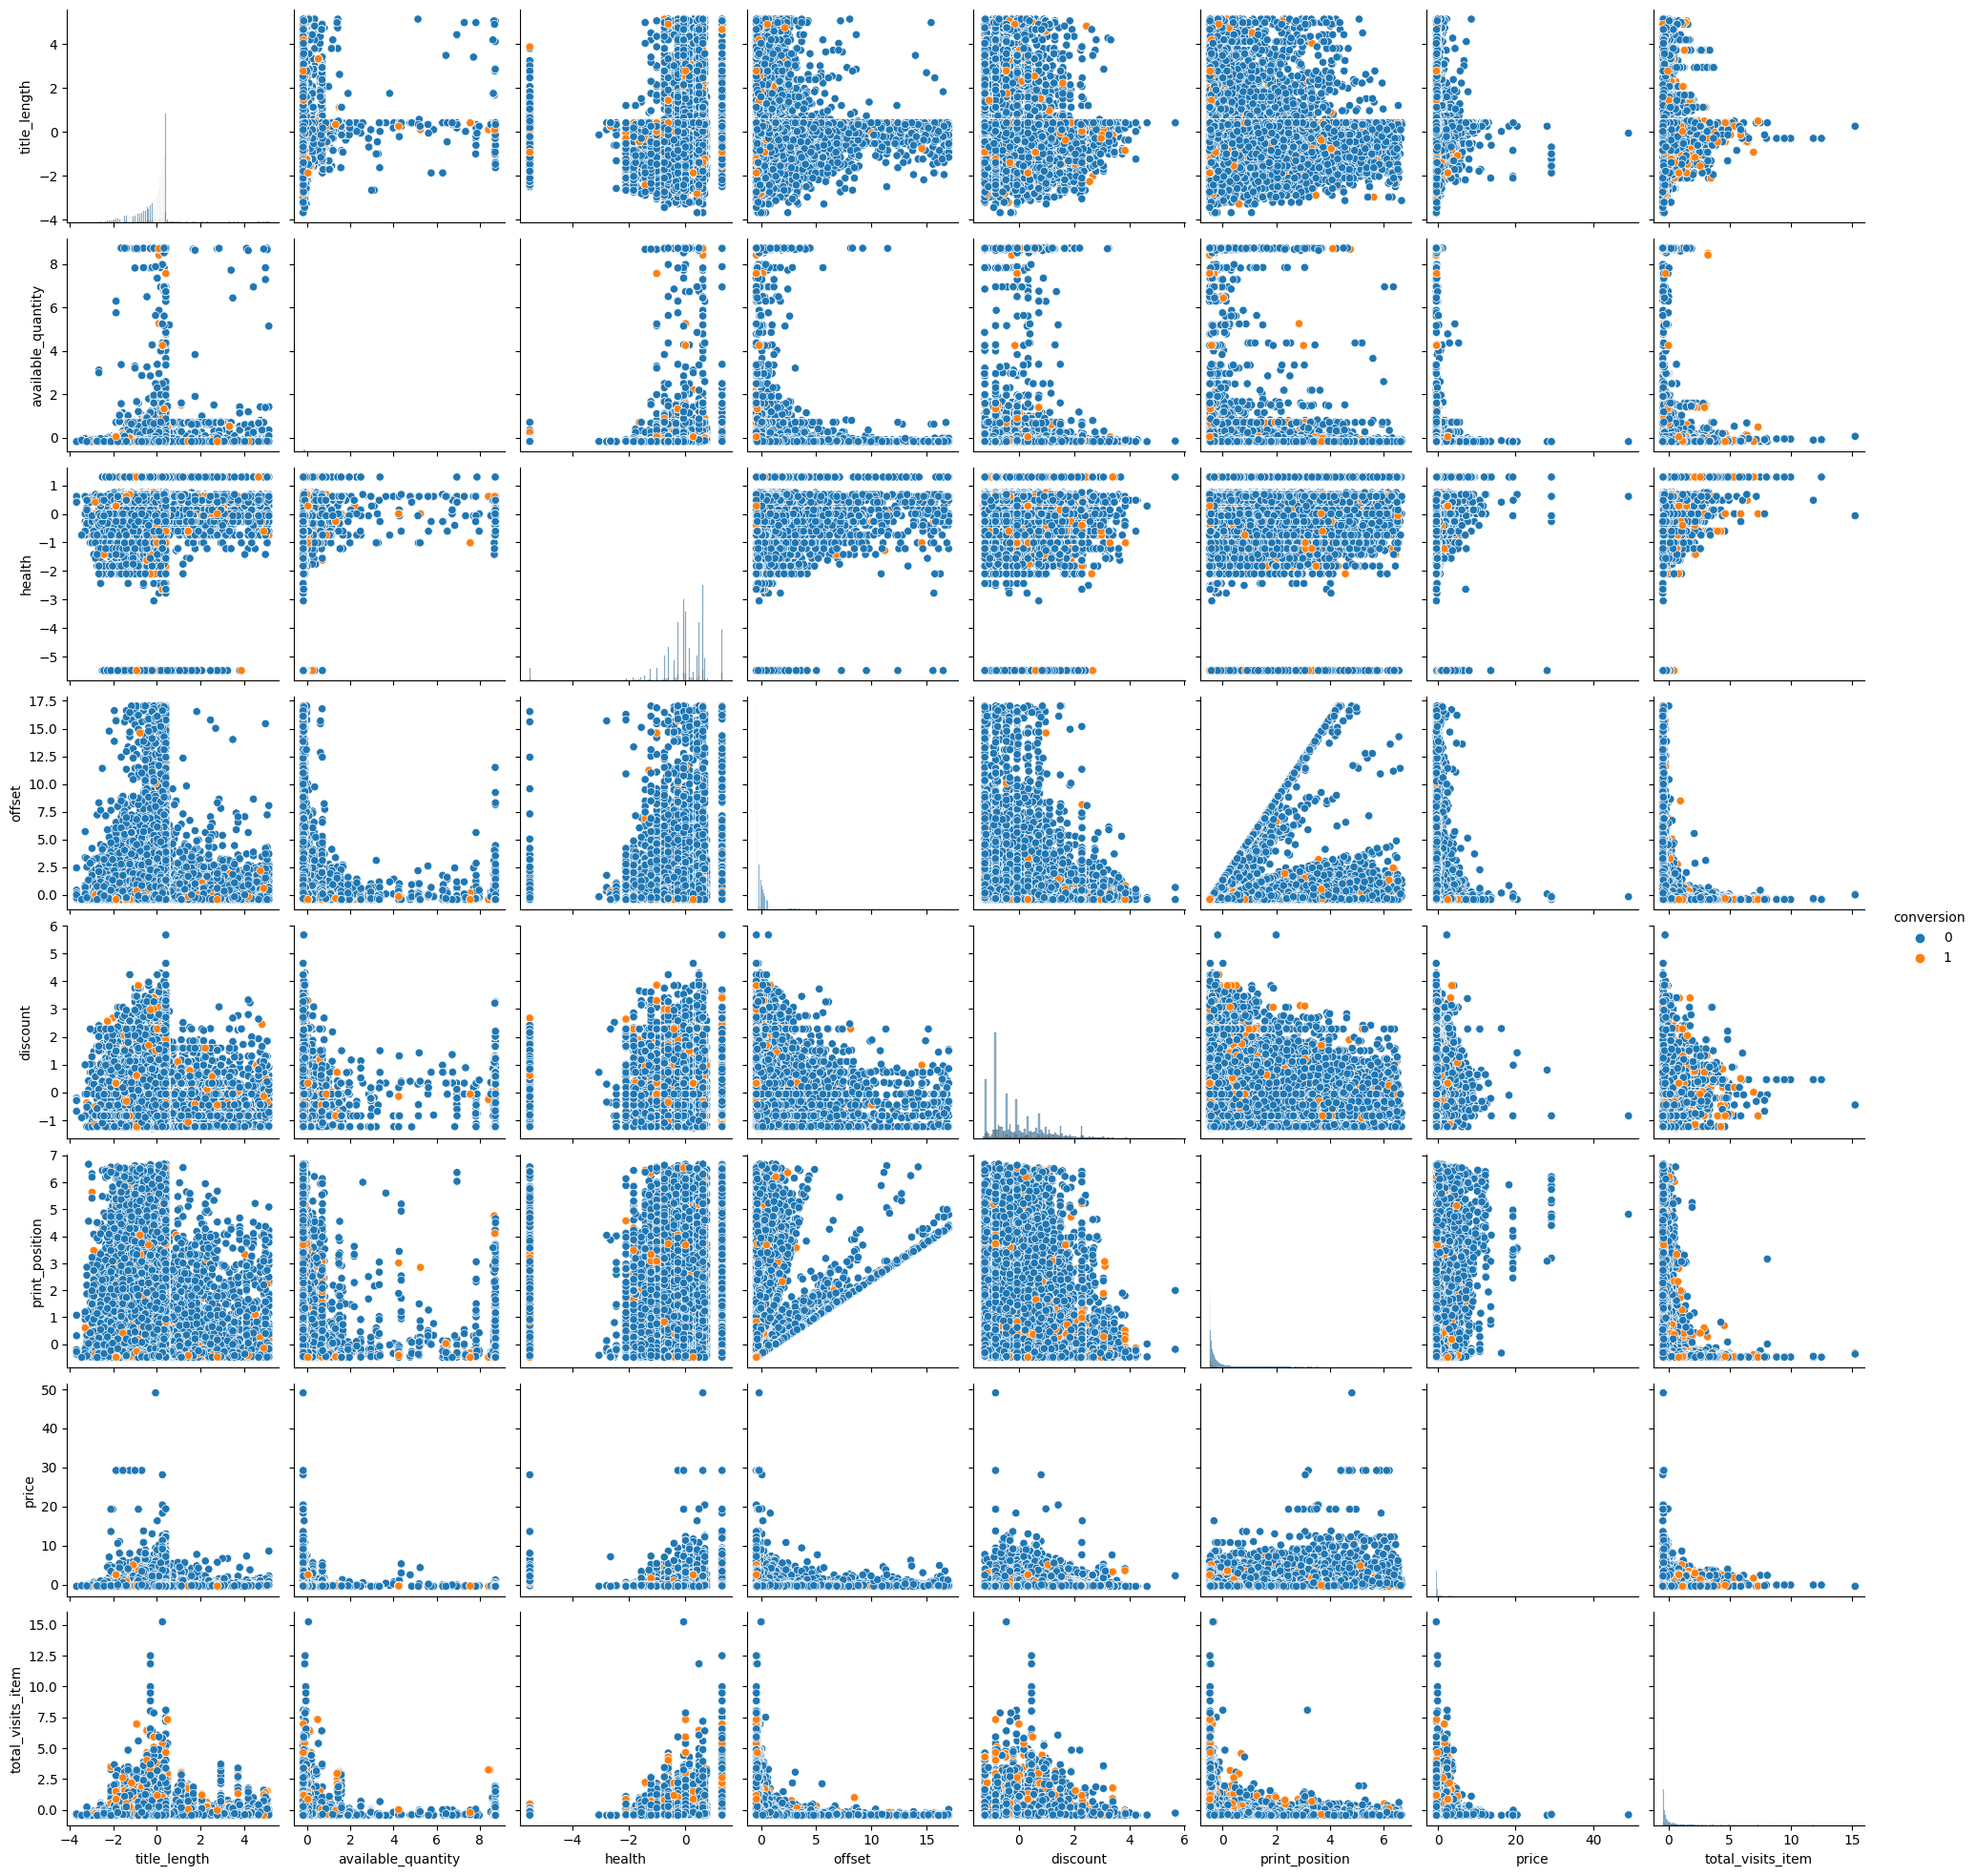

In [110]:
#sns.pairplot(plot_data, hue="conversion", dropna=True)
# TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
# To solve this, replace np.inf and -np.inf with np.nan and then convert to float64

# sns.pairplot(plot_data, hue="conversion", dropna=True)

sns.pairplot(plot_data, hue="conversion", dropna=True, diag_kind="hist")

### Validation Split

In [71]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.25, train_size=0.75, random_state=42)

## Models

### XGBoost

In [69]:
random_state = 12345

In [72]:
xgb1_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = random_state,
    eval_metric = 'auc',
    n_jobs=-1,
    #base_score=0.74
)

xgb1_model.fit(X_train_sub, y_train_sub, eval_set=[(X_val, y_val)], verbose=20)

[0]	validation_0-auc:0.86424
[20]	validation_0-auc:0.88461
[40]	validation_0-auc:0.88940
[60]	validation_0-auc:0.88944
[80]	validation_0-auc:0.88999
[99]	validation_0-auc:0.89000


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
roc_auc_score(y_test, xgb1_model.predict_proba(X_test)[:, xgb1_model.classes_ == 1])

0.8906875575382852

<Axes: title={'center': 'Feature importance'}, xlabel='Gain', ylabel='Features'>

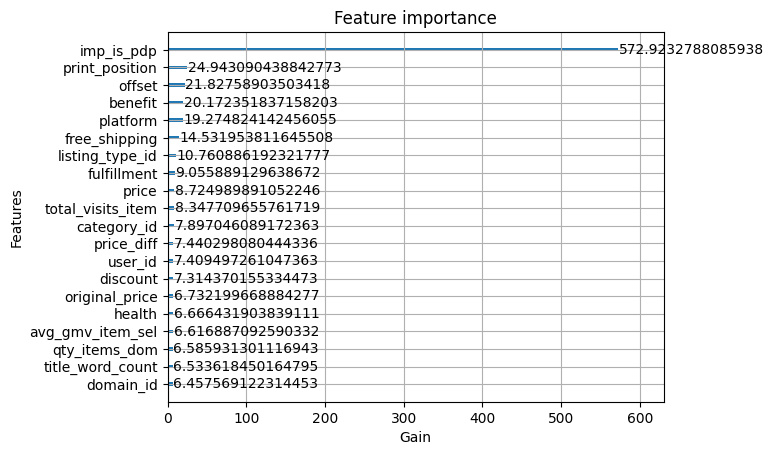

In [74]:
# Feature Importance
xgb.plot_importance(xgb1_model, max_num_features=20, importance_type="gain", xlabel="Gain")

In [75]:
# Get Feature Importance from the classifier xgb1_model
feature_importances = pd.DataFrame(
    xgb1_model.feature_importances_,
    index = X_train.columns,
    columns=['importance']).sort_values('importance', ascending=False)

# feature_importances.head(20)

In [76]:
# Add gain column
gains = sorted(xgb1_model.get_booster().get_score(importance_type="gain").items(), key=lambda x: x[1], reverse=True)

gains_pd = pd.DataFrame(gains, columns=["feature", "gain"]).set_index("feature").sort_values("gain", ascending=False)

gains_pd.head(20)

,gain
feature,
imp_is_pdp,572.923279
print_position,24.943090
offset,21.827589
benefit,20.172352
platform,19.274824
free_shipping,14.531954
listing_type_id,10.760886
fulfillment,9.055889
price,8.724990


In [77]:
feature_importances.head(20)

,importance
imp_is_pdp,0.685055
print_position,0.029825
offset,0.026100
benefit,0.024120
platform,0.023047
free_shipping,0.017376
listing_type_id,0.012867
fulfillment,0.010828
price,0.010433
total_visits_item,0.009982


In [78]:
xgb2_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = random_state,
    n_jobs=-1,
)

reduced_cols = gains_pd.head(20).index

xgb2_model.fit(X_train[reduced_cols], y_train)

roc_auc_score(y_test, xgb2_model.predict_proba(X_test[reduced_cols])[:, xgb2_model.classes_ == 1])

0.8931320289484158

<Axes: title={'center': 'Feature importance'}, xlabel='Gain', ylabel='Features'>

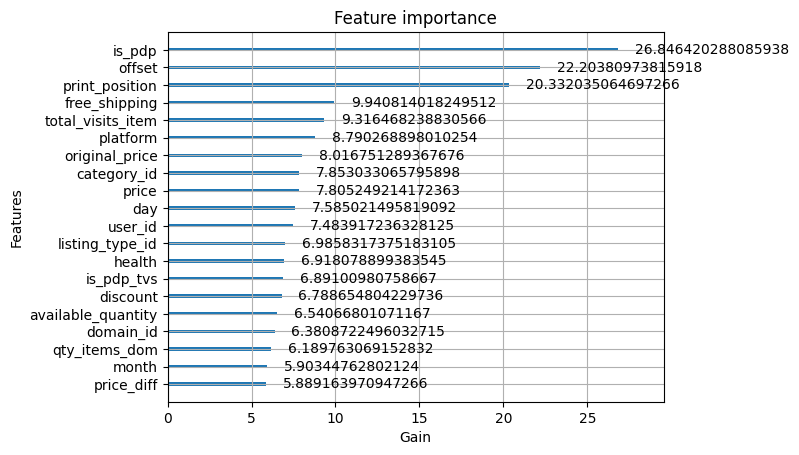

In [ ]:
# Feature Importance
xgb.plot_importance(xgb2_model, max_num_features=20, importance_type="gain", xlabel="Gain")

In [ ]:
for i in range(10, len(gains_pd.index)):

    xgb3_model = xgb.XGBClassifier(
        objective = 'binary:logistic',
        seed = random_state,
        n_jobs=-1,
    )

    reduced_cols = gains_pd.head(i).index

    xgb3_model.fit(X_train[reduced_cols], y_train)

    score = roc_auc_score(y_test, xgb3_model.predict_proba(X_test[reduced_cols])[:, xgb3_model.classes_ == 1])

    print(i, score)


10 0.7715228658183173
11 0.7836566124105597
12 0.7816655713037259
13 0.783615082899088
14 0.7851845729736279
15 0.7875734485187588
16 0.7870544286021879
17 0.7855632117299788
18 0.7873865686282193
19 0.7873896369098042
20 0.7872232132001924
21 0.7857404122692185
22 0.7879581365057865
23 0.7873037075589265
24 0.7864706720196906
25 0.7890022313917717
26 0.7889009780994678
27 0.788100788310823
28 0.7878105969922293
29 0.787370618803927
30 0.7898125983269261
31 0.7890393156793531


In [ ]:
full_cols = gains_pd.index

In [ ]:
#list(itertools.permutations(full_cols, 3))

In [ ]:
# Combinations of columns
len(list(itertools.permutations(full_cols, 2)))

992

## Retrain Model with Validation Data

In [ ]:
""" xgb2_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = random_state,
    n_jobs=-1,
)

xgb2_model.fit(X_train, y_train)

roc_auc_score(y_test, xgb2_model.predict_proba(X_test)[:, xgb2_model.classes_ == 1]) """

" xgb2_model = xgb.XGBClassifier(\n    objective = 'binary:logistic',\n    seed = random_state,\n    n_jobs=-1,\n)\n\nxgb2_model.fit(X_train, y_train)\n\nroc_auc_score(y_test, xgb2_model.predict_proba(X_test)[:, xgb2_model.classes_ == 1]) "

In [ ]:
""" xgb3_model = make_pipeline(
    SimpleImputer(strategy="median"),
    xgb.XGBClassifier(
        objective = 'binary:logistic',
        seed = random_state,
        n_jobs=-1,
    )
)

xgb3_model.fit(X_train, y_train)

roc_auc_score(y_test, xgb3_model.predict_proba(X_test)[:, xgb3_model.classes_ == 1]) """

' xgb3_model = make_pipeline(\n    SimpleImputer(strategy="median"),\n    xgb.XGBClassifier(\n        objective = \'binary:logistic\',\n        seed = random_state,\n        n_jobs=-1,\n    )\n)\n\nxgb3_model.fit(X_train, y_train)\n\nroc_auc_score(y_test, xgb3_model.predict_proba(X_test)[:, xgb3_model.classes_ == 1]) '

## Create Submission

In [ ]:
# model = xgb1_model

# comp_data = pd.read_csv("data/competition_data.csv")
# eval_data = comp_data[comp_data["ROW_ID"].notna()]
# del comp_data

# # Predict on the evaluation set
# eval_data = eval_data.drop(columns=["conversion"])
# eval_data = eval_data.select_dtypes(include='number')
# y_preds = model.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, model.classes_ == 1].squeeze()

# # Make the submission file
# submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
# submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
# submission_df.to_csv("los_simuladores_XGB_1.csv", index=False)

# del eval_data
# del submission_df
# gc.collect()